In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from dateutil import parser
import string
from collections import Counter
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import re
from datetime import datetime

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lalac\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Connecting the data in the notebook

In [2]:
df = pd.read_csv("C:/Users/lalac/OneDrive/Documents/Open Avenues project/sample - in.csv")
df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,119237,105834,True,Wed Oct 11 06:55:44 +0000 2017,@AppleSupport causing the reply to be disregar...,119236,NaN
1,119238,ChaseSupport,False,Wed Oct 11 13:25:49 +0000 2017,@105835 Your business means a lot to us. Pleas...,NaN,119239.0
2,119239,105835,True,Wed Oct 11 13:00:09 +0000 2017,@76328 I really hope you all change but I'm su...,119238,NaN
3,119240,VirginTrains,False,Tue Oct 10 15:16:08 +0000 2017,@105836 LiveChat is online at the moment - htt...,119241,119242.0
4,119241,105836,True,Tue Oct 10 15:17:21 +0000 2017,@VirginTrains see attached error message. I've...,119243,119240.0


<b>Create a few points on your understanding and explanation of each column:</b>
1. Automatic id
2. id of the person who is contacting and the company who is responding
3. inbound true if it's a user message and false if it's a message from the company
4. date and hour of the message
5. text sent or received
6 and 7. conversation between company and customer based on the tweet_id

<b>Create a few points on your understanding of the data:</b>
* Chatbot for people asking to solve their issues with different companies and the responses that are given by the supoort team

<b>Understanding the term Data Exploration</b>
* "Data exploration is the first step of data analysis used to explore and visualize data to uncover insights from the start or identify areas or patterns to dig into more"

<b>Data Exploration</b>

In [3]:
df.shape #Number of rows and columns

(93, 7)

In [4]:
df.info() #data type for each column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 93 non-null     int64  
 1   author_id                93 non-null     object 
 2   inbound                  93 non-null     bool   
 3   created_at               93 non-null     object 
 4   text                     93 non-null     object 
 5   response_tweet_id        65 non-null     object 
 6   in_response_to_tweet_id  68 non-null     float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 4.6+ KB


In [5]:
df.describe()

,tweet_id,in_response_to_tweet_id
count,93.000000,68.000000
mean,119285.451613,119285.676471
std,28.314045,28.910795
min,119237.000000,119239.000000
25%,119262.000000,119259.750000
50%,119285.000000,119284.500000
75%,119309.000000,119311.500000
max,119335.000000,119334.000000


In [6]:
df.isnull().sum() #I'm unsure if we need to replace the null values

tweet_id                    0
author_id                   0
inbound                     0
created_at                  0
text                        0
response_tweet_id          28
in_response_to_tweet_id    25
dtype: int64

In [7]:
#In case we need it, here we are replacing Null values with the word Null
#df['response_tweet_id'].replace(np.nan,'Null',inplace=True)
#df['in_response_to_tweet_id'].replace(np.nan,'Null',inplace=True)

In [8]:
#df.isnull().sum()

In [9]:
#Duplicate values
duplicate= df.duplicated()
print(duplicate.sum())
df[duplicate] #there aren't rows with same values

0


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id


Inserting the new dataset

In [10]:
df2 = pd.read_csv("C:/Users/lalac/OneDrive/Documents/Open Avenues project/twcs.csv")
df2.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0


In [11]:
df2.shape #Number of rows and columns

(2811774, 7)

In [12]:
df2.info() #datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2811774 entries, 0 to 2811773
Data columns (total 7 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tweet_id                 int64  
 1   author_id                object 
 2   inbound                  bool   
 3   created_at               object 
 4   text                     object 
 5   response_tweet_id        object 
 6   in_response_to_tweet_id  float64
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 131.4+ MB


In [13]:
df2.isnull().sum() #finding null values

tweet_id                         0
author_id                        0
inbound                          0
created_at                       0
text                             0
response_tweet_id          1040629
in_response_to_tweet_id     794335
dtype: int64

In [14]:
duplicate2= df2.duplicated()
print(duplicate2.sum())
df2[duplicate2]

0


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id


3 ways that should be cleaned:
1. Deleting information that isn't relevant( for example at created_at we only need the date and time)
2. Finding the Null values and understand what are they telling us and replace with a value
3. Find duplicates or group the data by tweet id


<b>How many are inbound and outbound responses?</b>

In [15]:
inbound = df[df['inbound'] ==True]
inbound.count()

tweet_id                   49
author_id                  49
inbound                    49
created_at                 49
text                       49
response_tweet_id          44
in_response_to_tweet_id    24
dtype: int64

In [16]:
outbound = 93 - inbound.count()
outbound 

tweet_id                   44
author_id                  44
inbound                    44
created_at                 44
text                       44
response_tweet_id          49
in_response_to_tweet_id    69
dtype: int64

In [17]:
inbound2 = df2[df2['inbound']==True]
inbound2.count()

tweet_id                   1537843
author_id                  1537843
inbound                    1537843
created_at                 1537843
text                       1537843
response_tweet_id          1303829
in_response_to_tweet_id     750497
dtype: int64

In [18]:
outbound2 = 2811774 - inbound2.count()
outbound2 

tweet_id                   1273931
author_id                  1273931
inbound                    1273931
created_at                 1273931
text                       1273931
response_tweet_id          1507945
in_response_to_tweet_id    2061277
dtype: int64

For the first dataset 49 are inbound responses and 44 are outbound responses. 
For the second data set 1537873 are inbound and 1273931 are outbound responses

<b>How many are unique tweets?</b>

In [19]:
select_tweet= df['text']
duplicate_tweet=select_tweet.duplicated().sum()
duplicate_tweet

0

In [20]:
select_tweet2= df2['text']
duplicate_tweet2=select_tweet2.duplicated().sum()
duplicate_tweet2

29156

In [21]:
unique_tweet2 = 2811774 - duplicate_tweet2
unique_tweet2

2782618

All the tweets are different base on the text column for first data set but for second there are 2782618 unique tweets

<b>Top 20 tweer users </b>

In [22]:
author_id = df.groupby(['author_id']).count().sort_values(by='tweet_id', ascending = False)
top_20= author_id.head(20)
top_20

,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
author_id,,,,,,
AppleSupport,13,13,13,13,3,13
Tesco,8,8,8,8,6,8
SpotifyCares,8,8,8,8,6,8
105855,4,4,4,4,3,3
VirginTrains,4,4,4,4,3,4
105847,4,4,4,4,4,3
105840,4,4,4,4,4,3
105848,3,3,3,3,1,2
105836,3,3,3,3,3,3


In [23]:
author_id2= df2.groupby(['author_id']).count().sort_values(by='tweet_id', ascending = False)
top_202= author_id2.head(20)
top_202

,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
author_id,,,,,,
AmazonHelp,169840,169840,169840,169840,85274,169287
AppleSupport,106860,106860,106860,106860,31564,106719
Uber_Support,56270,56270,56270,56270,18036,56261
SpotifyCares,43265,43265,43265,43265,13786,43243
Delta,42253,42253,42253,42253,12014,42197
Tesco,38573,38573,38573,38573,11148,38501
AmericanAir,36764,36764,36764,36764,14556,36598
TMobileHelp,34317,34317,34317,34317,9759,34287
comcastcares,33031,33031,33031,33031,7625,33007


# Data Cleaning

<b>1. Cleaning tweets that are not in_response to customers tweets at first</b>

In [24]:
#Tweets by company where inbound = false
df_comp= df2[df2['inbound'] == False]
df_comp

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
5,6,sprintcare,False,Tue Oct 31 21:46:24 +0000 2017,@115712 Can you please send us a private messa...,"5,7",8.0
7,11,sprintcare,False,Tue Oct 31 22:10:35 +0000 2017,@115713 This is saddening to hear. Please shoo...,NaN,12.0
9,15,sprintcare,False,Tue Oct 31 20:03:31 +0000 2017,@115713 We understand your concerns and we'd l...,12,16.0
...,...,...,...,...,...,...,...
2811764,2987943,AirAsiaSupport,False,Wed Nov 22 07:54:57 +0000 2017,"@823868 Sorry but kindly try to clear browser,...",NaN,2987944.0
2811766,139628,ArgosHelpers,False,Wed Nov 22 08:03:26 +0000 2017,@134664 Can you Dm us your order number and we...,NaN,139627.0
2811767,2987945,VirginTrains,False,Wed Nov 22 08:27:34 +0000 2017,@524544 That's a Peak service. The 09:56 is th...,NaN,2987946.0
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0


In [25]:
#Clean rows if there is not a value in in_response_to_tweet_id when the inbound is a company (inbound == False)
filtered_df = df2.drop(df2[(df2["inbound"] == False) & (df2['in_response_to_tweet_id'].isnull())].index)

In [26]:
filtered_df

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,Tue Oct 31 22:10:47 +0000 2017,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,Tue Oct 31 22:11:45 +0000 2017,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,Tue Oct 31 22:08:27 +0000 2017,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,Tue Oct 31 21:54:49 +0000 2017,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,Tue Oct 31 21:49:35 +0000 2017,@sprintcare I did.,4,6.0
...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,Wed Nov 22 08:43:51 +0000 2017,"@823869 Hey, we'd be happy to look into this f...",NaN,2987948.0
2811770,2987948,823869,True,Wed Nov 22 08:35:16 +0000 2017,@115714 wtf!? I’ve been having really shitty s...,2987947,NaN
2811771,2812240,121673,True,Thu Nov 23 04:13:07 +0000 2017,@143549 @sprintcare You have to go to https://...,NaN,2812239.0
2811772,2987949,AldiUK,False,Wed Nov 22 08:31:24 +0000 2017,"@823870 Sounds delicious, Sarah! 😋 https://t.c...",NaN,2987950.0


Only 1266942 of the tweets were responses to customers tweets from companies

<b> 2. Finding outliners </b>

In [27]:
print(type(filtered_df))

<class 'pandas.core.frame.DataFrame'>


In [28]:
#getting all the customer inbound = true, and finding the ones with a most tweets
customers= filtered_df[(filtered_df["inbound"] == True)]
false_customer = customers.groupby(['author_id']).count().sort_values(by='tweet_id', ascending = False)
num_tweets_false_customer= false_customer['in_response_to_tweet_id']
num_tweets_false_customer


author_id
115911    1124
120576    1002
115913     179
116230     432
169172     446
          ... 
549508       0
549507       0
345292       0
549505       0
263844       0
Name: in_response_to_tweet_id, Length: 702669, dtype: int64

In [29]:
# exploring some of the false customers
cust_115911= filtered_df[(filtered_df["author_id"] == "115911")]
cust_115911
#this should be a company

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
622,1068,115911,True,Tue Oct 31 22:19:12 +0000 2017,@115910 No sir! You can still preorder at http...,1067,1069.0
624,1070,115911,True,Tue Oct 31 22:16:12 +0000 2017,@115910 Go for it Trevor *ErikS,1069,1071.0
626,1072,115911,True,Thu Oct 26 21:13:40 +0000 2017,Be ready for your next iPhone. Join our iPhone...,"1071,1073,1074,1075,1076,1077,1078,1079,1080,1...",NaN
1346,1950,115911,True,Tue Oct 31 22:27:18 +0000 2017,"@116149 I mean...it does say to ""submit your c...",1949,1951.0
1348,1952,115911,True,Tue Oct 31 13:00:17 +0000 2017,Happy Halloween! Submit your costume pics with...,"1953,1954,1955,1956,1957,1958,1959,1960,1961,1...",NaN
...,...,...,...,...,...,...,...
2797680,2974233,115911,True,Thu Nov 30 02:24:15 +0000 2017,@820276 Come back to your #MagentaFam! 🙌👍😊 *JPL,2974232,2974234.0
2802786,2979188,115911,True,Tue Oct 31 20:26:47 +0000 2017,@576616 You can block known scam numbers by di...,2979187,2979189.0
2802788,2979190,115911,True,Tue Oct 31 20:20:33 +0000 2017,@576616 We're working to cut down on scam call...,2979189,2979191.0
2811004,2987195,115911,True,Tue Nov 21 21:31:55 +0000 2017,"@823653 Of course, Shawn! Where are you going ...",2987194,2987196.0


In [30]:
num_tweets_false_customer.mean()

1.0680661876359994

In [31]:
num_tweets_false_customer.median()

0.0

In [32]:
# outliner max num the tweets from false customers
num_tweets_false_customer.max()


1124

In [33]:
#number of author_id that coudl be companies
false_customer.head(20)

,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
author_id,,,,,,
115911,1286,1286,1286,1286,1286,1124
120576,1010,1010,1010,1010,669,1002
115913,563,563,563,563,561,179
116230,454,454,454,454,454,432
169172,448,448,448,448,447,446
117627,406,406,406,406,302,382
115888,332,332,332,332,332,1
116136,295,295,295,295,290,247
116421,276,276,276,276,218,172


In [34]:
cust_176402 = filtered_df[(filtered_df["author_id"] == '176402')]
cust_176402.head(5)
#this could be a customer

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
218496,254108,176402,True,Thu Oct 05 22:32:41 +0000 2017,@AppleSupport @176401 I have the same problem ...,NaN,254107.0
220081,255805,176402,True,Thu Oct 05 21:29:36 +0000 2017,@AppleSupport @176842 11.0.2 stinks Apple just...,NaN,255804.0
224830,260869,176402,True,Thu Oct 05 21:33:22 +0000 2017,@AppleSupport @178108 Kevin I honestly think t...,NaN,260868.0
224833,260873,176402,True,Thu Oct 05 21:34:06 +0000 2017,@AppleSupport @178109 Over two weeks people ar...,260875,260872.0
224834,260875,176402,True,Thu Oct 05 21:34:23 +0000 2017,@AppleSupport @178109 They want us all to go b...,NaN,260873.0


<b>3. Cleaning Date format</b>

In [35]:
#Changing the format of the date column
filtered_df['created_at'] = filtered_df['created_at'].apply(lambda x: parser.parse(x))

In [36]:
filtered_df.head(5)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0


<b> Top authors by response </b>

In [37]:
top_authors_by_response = filtered_df.groupby(['author_id']).count().sort_values(by='response_tweet_id', ascending = False)
top_authors_by_response

,tweet_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id
author_id,,,,,,
AmazonHelp,169287,169287,169287,169287,84721,169287
AppleSupport,106719,106719,106719,106719,31423,106719
Uber_Support,56261,56261,56261,56261,18027,56261
VirginTrains,27522,27522,27522,27522,14940,27522
AmericanAir,36598,36598,36598,36598,14390,36598
...,...,...,...,...,...,...
192677,1,1,1,1,0,1
192684,1,1,1,1,0,1
277307,1,1,1,1,0,1


<b>4. Text cleaning</b>

In [38]:
#Make sure all the values in the column text are string type
filtered_df["text"] = filtered_df["text"].astype(str)

Text to Lower casing

In [39]:
#convert the text to lower case to have all the text in the same case format, so all the text data is the treated the same way
filtered_df["text_lower"] = filtered_df["text"].str.lower()
filtered_df.head(5)

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_lower
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0,@115712 i understand. i would like to assist y...
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,@sprintcare and how do you propose we do that
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,@sprintcare i have sent several private messag...
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0,@115712 please send us a private message so th...
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,@sprintcare i did.


Removal of Punctuations

In [40]:
#making an array with the punctuation symbols
punctuations = string.punctuation
print(punctuations)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [41]:
#creating a function to remove all the puntuaction symbols above in the text column
def remove_punctuations(text):
    """Function to remove the punctuation symbols"""
    return text.translate(str.maketrans('', '',punctuations))

In [42]:
#applying the punctuation function
filtered_df["text_wo_punct"] = filtered_df["text_lower"].apply(lambda text: remove_punctuations(text))
filtered_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_lower,text_wo_punct
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0,@115712 please send us a private message so th...,115712 please send us a private message so tha...
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,@sprintcare i did.,sprintcare i did


Removal of stopwords

In [43]:
#Remove commonly occuring words that don't provide valuable information for downstream analysis (i.e "the, so, a")
stopwords_set = set(stopwords.words('english'))

def remove_stopwords(text):
    """Function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in stopwords_set])

filtered_df["text_wo_stop"] = filtered_df["text_wo_punct"].apply(lambda text: remove_stopwords(text))
filtered_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_lower,text_wo_punct,text_wo_stop
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,@sprintcare i did.,sprintcare i did,sprintcare


Removal of most common words

In [44]:
#Finding the most common words 
cnt = Counter()

for text in filtered_df["text_wo_stop"].values:
    for word in text.split():
        cnt[word]+=1
        
cnt.most_common(15)

[('us', 450175),
 ('please', 401652),
 ('dm', 334913),
 ('help', 266991),
 ('hi', 223944),
 ('thanks', 206182),
 ('get', 199961),
 ('sorry', 191799),
 ('like', 146129),
 ('know', 145027),
 ('look', 139418),
 ('send', 138746),
 ('amazonhelp', 137271),
 ('well', 133716),
 ('service', 133340)]

In [45]:
#removing common words
common_words = set([w for (w, wc) in cnt.most_common(15)])

def remove_commonwords(text):
    """Function to remove the frequent words"""
    return " ".join([word for word in str(text).split() if word not in common_words])

filtered_df["text_wo_common"] = filtered_df["text_wo_stop"].apply(lambda text: remove_commonwords(text))
filtered_df.head()

,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_lower,text_wo_punct,text_wo_stop,text_wo_common
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 private message assist click ‘message’ ...
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare


Removal of URLs

In [46]:
def remove_urls(text):
    # Regular expression pattern to match URLs
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    
    # Replace URLs with empty string
    text_without_urls = re.sub(url_pattern, '', text)
    
    return text_without_urls

filtered_df["text_wo_url"] = filtered_df["text_wo_common"].apply(lambda text: remove_urls(text))
filtered_df.head()


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_lower,text_wo_punct,text_wo_stop,text_wo_common,text_wo_url
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 private message assist click ‘message’ ...,115712 private message assist click ‘message’ ...
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare


Remove Emoji

In [47]:
#function to remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"  # dingbat symbols
                           u"\U000024C2-\U0001F251"  # 
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

filtered_df["text_wo_emoji"] = filtered_df["text_wo_url"].apply(lambda text: remove_emoji(text))
filtered_df.head()


,tweet_id,author_id,inbound,created_at,text,response_tweet_id,in_response_to_tweet_id,text_lower,text_wo_punct,text_wo_stop,text_wo_common,text_wo_url,text_wo_emoji
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,@115712 I understand. I would like to assist y...,2,3.0,@115712 i understand. i would like to assist y...,115712 i understand i would like to assist you...,115712 understand would like assist would need...,115712 understand would assist would need priv...,115712 understand would assist would need priv...,115712 understand would assist would need priv...
1,2,115712,True,2017-10-31 22:11:45+00:00,@sprintcare and how do you propose we do that,NaN,1.0,@sprintcare and how do you propose we do that,sprintcare and how do you propose we do that,sprintcare propose,sprintcare propose,sprintcare propose,sprintcare propose
2,3,115712,True,2017-10-31 22:08:27+00:00,@sprintcare I have sent several private messag...,1,4.0,@sprintcare i have sent several private messag...,sprintcare i have sent several private message...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...,sprintcare sent several private messages one r...
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,@115712 Please send us a Private Message so th...,3,5.0,@115712 please send us a private message so th...,115712 please send us a private message so tha...,115712 please send us private message assist c...,115712 private message assist click ‘message’ ...,115712 private message assist click ‘message’ ...,115712 private message assist click ‘message’ ...
4,5,115712,True,2017-10-31 21:49:35+00:00,@sprintcare I did.,4,6.0,@sprintcare i did.,sprintcare i did,sprintcare,sprintcare,sprintcare,sprintcare


In [58]:
#Droping all the other columns of text cleaning and leaving the last one
clean_df = filtered_df.drop(columns=['text_lower','text_wo_punct','text_wo_stop','text_wo_common','text_wo_url','text'])
clean_df.rename(columns={'text_wo_emoji': 'text'}, inplace=True)
clean_df 

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,text
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,2,3.0,115712 understand would assist would need priv...
1,2,115712,True,2017-10-31 22:11:45+00:00,NaN,1.0,sprintcare propose
2,3,115712,True,2017-10-31 22:08:27+00:00,1,4.0,sprintcare sent several private messages one r...
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,3,5.0,115712 private message assist click ‘message’ ...
4,5,115712,True,2017-10-31 21:49:35+00:00,4,6.0,sprintcare
...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,2017-11-22 08:43:51+00:00,NaN,2987948.0,823869 hey wed happy direct message assist tn
2811770,2987948,823869,True,2017-11-22 08:35:16+00:00,2987947,NaN,115714 wtf i’ve really shitty day shit together
2811771,2812240,121673,True,2017-11-23 04:13:07+00:00,NaN,2812239.0,143549 sprintcare go httpstcov2tmhetl7q ask ad...
2811772,2987949,AldiUK,False,2017-11-22 08:31:24+00:00,NaN,2987950.0,823870 sounds delicious sarah httpstco7uqpwyh1b6


Code source: https://www.kaggle.com/code/sudalairajkumar/getting-started-with-text-preprocessing#Chat-Words-Conversion

__Questions based on the data__

1. What are the top 20 companies by number of tweets response and in response?

Finding how many companies are in the data frame

In [59]:
#Grouping by author id and selecting the response_tweet_id', 'in_response_to_tweet_id
sort_table = clean_df.groupby(['author_id']).count().sort_values(by='tweet_id', ascending = False).loc[:, ['response_tweet_id', 'in_response_to_tweet_id']]
print(f'There are {len(sort_table)} companies in the dataset')

There are 702777 companies in the dataset


Selecting the top 20 companies based on the number of response_tweet_id	and in_response_to_tweet_id

In [60]:
#Top 20 companies by number of tweets
bar_top20 = sort_table.head(20)
bar_top20

,response_tweet_id,in_response_to_tweet_id
author_id,,
AmazonHelp,84721,169287
AppleSupport,31423,106719
Uber_Support,18027,56261
SpotifyCares,13764,43243
Delta,11958,42197
Tesco,11076,38501
AmericanAir,14390,36598
TMobileHelp,9729,34287
comcastcares,7601,33007


Creating a stack Bar chart to show the top 20 companies by number of tweets. Each bar has the percentage of tweets that are response_tweet_id(light blue) and in_response_to_tweet_id (steelblue)

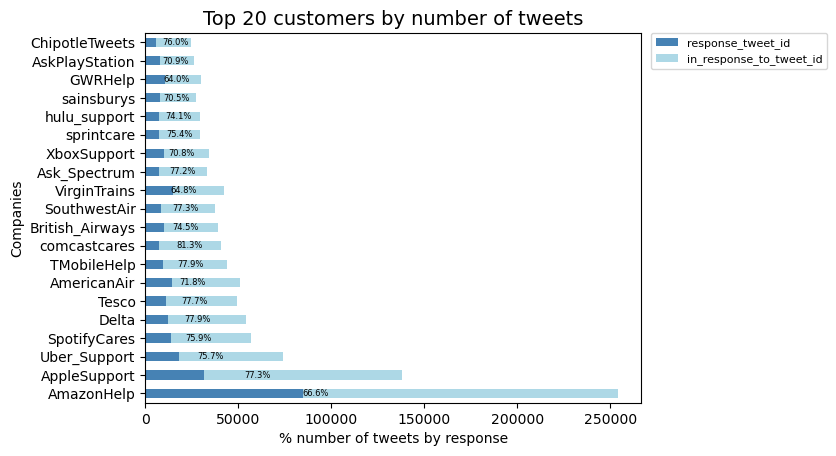

In [61]:
#creating  stacked the bar chart and selecting the color for each bar stacked
bar_top20.plot.barh(
  stacked = True, 
  mark_right = True,
    color = ['steelblue','lightblue'])

#seleceting each axes label
plt.ylabel('Companies')
plt.xlabel('% number of tweets by response')

#adding the number of response_tweet_id plus in_response_to_tweet_id
df_total = bar_top20["in_response_to_tweet_id"] + bar_top20["response_tweet_id"] 
#findg the percentage of each category response_tweet_id and in_response_to_tweet_id
df_rel = bar_top20[bar_top20.columns[1:2]].div(df_total, 0)*100

#loop to add every stacked bar chart and assinged their percentage in each category response_tweet_id and in_response_to_tweet_id
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(bar_top20.iloc[:, 1:].cumsum(1)[n],
                                         bar_top20[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', va = "center",
                 ha = 'left',fontsize = 6)

#title of the chart
plt.title('Top 20 customers by number of tweets', fontsize = 14 )

#legend of the chart
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, fontsize = 8)


plt.show()

2. Number of tweets by date and finding if there is a pattern of number of tweets by day, week, month, etc?

Create a column 'only_date' extracting the date from 'created_at' column and ending with only date format YYMMDD

In [69]:
#creating a column only selecting the date from created_at
d = datetime.now()
#extracting only the YYMMDD
clean_df["only_date"] = [d.date() for d in clean_df["created_at"]]
clean_df

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,text,only_date
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,2,3.0,115712 understand would assist would need priv...,2017-10-31
1,2,115712,True,2017-10-31 22:11:45+00:00,NaN,1.0,sprintcare propose,2017-10-31
2,3,115712,True,2017-10-31 22:08:27+00:00,1,4.0,sprintcare sent several private messages one r...,2017-10-31
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,3,5.0,115712 private message assist click ‘message’ ...,2017-10-31
4,5,115712,True,2017-10-31 21:49:35+00:00,4,6.0,sprintcare,2017-10-31
...,...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,2017-11-22 08:43:51+00:00,NaN,2987948.0,823869 hey wed happy direct message assist tn,2017-11-22
2811770,2987948,823869,True,2017-11-22 08:35:16+00:00,2987947,NaN,115714 wtf i’ve really shitty day shit together,2017-11-22
2811771,2812240,121673,True,2017-11-23 04:13:07+00:00,NaN,2812239.0,143549 sprintcare go httpstcov2tmhetl7q ask ad...,2017-11-23
2811772,2987949,AldiUK,False,2017-11-22 08:31:24+00:00,NaN,2987950.0,823870 sounds delicious sarah httpstco7uqpwyh1b6,2017-11-22


Finding number of tweets by date.

In [70]:
by_date = clean_df.groupby(['only_date']).count().sort_values(by='tweet_id', ascending = False).loc[:, ['tweet_id']]
by_date

,tweet_id
only_date,
2017-11-07,62621
2017-10-27,58984
2017-11-08,58034
2017-11-06,57844
2017-11-03,57099
...,...
2015-01-18,1
2015-01-14,1
2015-01-10,1


Average of the number of tweets by date

In [71]:
by_date.mean()

tweet_id    2933.875523
dtype: float64

Minimum number of tweets by date

In [72]:
by_date.min()

tweet_id    1
dtype: int64

Maximum number of tweets by date

In [73]:
by_date.max()

tweet_id    62621
dtype: int64

Finding date range minimum and maximum in the date set

In [74]:
clean_df['only_date'].min()

datetime.date(2008, 5, 8)

In [75]:
clean_df['only_date'].max()

datetime.date(2017, 12, 3)

In [78]:
type(clean_df['only_date'])

pandas.core.series.Series

Extract the year from the 'created_at' and created a new column 'year'

In [81]:
clean_df['year'] = clean_df['created_at'].dt.year
clean_df

,tweet_id,author_id,inbound,created_at,response_tweet_id,in_response_to_tweet_id,text,only_date,Year,year
0,1,sprintcare,False,2017-10-31 22:10:47+00:00,2,3.0,115712 understand would assist would need priv...,2017-10-31,2017,2017
1,2,115712,True,2017-10-31 22:11:45+00:00,NaN,1.0,sprintcare propose,2017-10-31,2017,2017
2,3,115712,True,2017-10-31 22:08:27+00:00,1,4.0,sprintcare sent several private messages one r...,2017-10-31,2017,2017
3,4,sprintcare,False,2017-10-31 21:54:49+00:00,3,5.0,115712 private message assist click ‘message’ ...,2017-10-31,2017,2017
4,5,115712,True,2017-10-31 21:49:35+00:00,4,6.0,sprintcare,2017-10-31,2017,2017
...,...,...,...,...,...,...,...,...,...,...
2811769,2987947,sprintcare,False,2017-11-22 08:43:51+00:00,NaN,2987948.0,823869 hey wed happy direct message assist tn,2017-11-22,2017,2017
2811770,2987948,823869,True,2017-11-22 08:35:16+00:00,2987947,NaN,115714 wtf i’ve really shitty day shit together,2017-11-22,2017,2017
2811771,2812240,121673,True,2017-11-23 04:13:07+00:00,NaN,2812239.0,143549 sprintcare go httpstcov2tmhetl7q ask ad...,2017-11-23,2017,2017
2811772,2987949,AldiUK,False,2017-11-22 08:31:24+00:00,NaN,2987950.0,823870 sounds delicious sarah httpstco7uqpwyh1b6,2017-11-22,2017,2017


Number of tweets by tweet_id, response_tweet_id	and in_response_to_tweet_id per year

In [85]:
#grouping by year to find the number of tweets for each year in the dataset
by_year = clean_df.groupby(['year']).count().sort_values(by='tweet_id', ascending = False).loc[:, ['tweet_id','response_tweet_id', 'in_response_to_tweet_id']]
by_year

,tweet_id,response_tweet_id,in_response_to_tweet_id
year,,,
2017,2802572,1761944,2015802
2016,1481,1480,1164
2015,403,403,264
2014,184,184,125
2013,75,75,47
2012,52,52,31
2011,10,10,2
2010,6,6,2
2008,2,2,2


The year with more tweets is 2017

3. What's the turnaround time?